# Project 2

## GENERAL INSTRUCTIONS:

**this is NOT a group project**
- **CLEARLY** mark where you are answering each question (all written questions must be answered in Markdown cells, NOT as comments in code cells)
- Show all code necessary for the analysis, but remove superfluous code

---


# DONUTS

Using the dataset [*krispykreme.csv*](https://raw.githubusercontent.com/cmparlettpelleriti/CPSC392ParlettPelleriti/master/Data/KrispyKreme.csv),

- **a)** make 3 scatterplots using ggplot to show:
    - `Sodium_100g` vs `Total_Fat_100g`
    - `Sodium_100g` vs. `Sugar_100g`
    - `Sugar_100g` vs `Total_Fat_100g`
    
    
    
- **b)** Using the scatterplots from part **a** as well as the donuts dataset, **thouroughly discuss which clustering method** (KMeans, Gaussian Mixture Models (EM), Hierarchical Clustering, or DBSCAN) **you think would be best for this data and WHY**. Be sure to include discussions of assumptions each algorithm does/does not make, and what types of data they are good/bad for (**mention each of the 4 algorithms at least once**). (*IN A MARKDOWN CELL*)

Please note that for this assignment, "It's easier to code" or "it's comuptationally efficient" does not count as a valid reason. The reasons should be based on the algorithms/data.


(Please use "\*\*" to make any mention of one of the algorithms bold in your discussion. For example "I think \*\*DBSCAN\*\* is the best algorithm ever!" will make the word "DBSCAN" bold in a Markdown cell).

- **c)** **Implement the algorithm** you think will work best here using the 3 variables `Sodium_100g`, `Total_Fat_100g` and `Sugar_100g`, and describe **how you chose any hyperparameters** (such as distance, # of clusters, min_samples, eps, linkage...etc). Make sure to z-score your variables. (*IN A MARKDOWN CELL*)



- **d)** **Thouroughly discuss the performance** of your clustering model. 
    - which metric did you use to asses your model? (*IN A MARKDOWN CELL*)
    - how did your model perform? (*IN A MARKDOWN CELL*)
    - remake the 3 graphs from part a, but color by cluster assignment. Describe what characterizes each cluster, and give an example of a label for that cluster (e.g. "these donuts are low fat, and low sugar so I would call these healthy donuts") (*IN A MARKDOWN CELL*)



- **e)** Choose ONE other of the `_100g` variables from the data set to **add to your clustering model** to improve it.
    - explain why you chose this variable. (*IN A MARKDOWN CELL*)
    - make a new model, identical to the model in part c, but also including your new variable.
    - did this variable improve the fit of your clustering model? How can you tell? (*IN A MARKDOWN CELL*)
    
    
    
Note: The columns with `_100g` at the end represent the amount of that nutrient per 100 grams of the food. For example, `Total_Fat` tells you the total amount of fat in that food, whereas `Total_Fat_100g` tells you how much fat there is per 100 grams of that food.

In [95]:
import warnings 
warnings.filterwarnings('ignore')

import pandas as pd 
import numpy as np 
from plotnine import *

from sklearn.preprocessing import StandardScaler
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score 
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import DBSCAN
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture

import scipy.cluster.hierarchy as sch 
from matplotlib import pyplot as plt

from sklearn.neighbors import KNeighborsClassifier 
from sklearn.model_selection import train_test_split
from sklearn import metrics

from sklearn.preprocessing import StandardScaler 
from sklearn.model_selection import train_test_split 
from sklearn.model_selection import KFold 
from sklearn.model_selection import LeaveOneOut 
from sklearn.model_selection import cross_val_score 
from sklearn.metrics import plot_confusion_matrix 
from sklearn.model_selection import GridSearchCV 
from PIL import Image

%matplotlib inline

In [96]:
df = pd.read_csv("https://raw.githubusercontent.com/cmparlettpelleriti/CPSC392ParlettPelleriti/master/Data/KrispyKreme.csv")

df.head()

,Restaurant_Item_Name,restaurant,Restaurant_ID,Item_Name,Item_Description,Food_Category,Serving_Size,Serving_Size_text,Serving_Size_Unit,Serving_Size_household,...,Total_Fat_100g,Saturated_Fat_100g,Trans_Fat_100g,Cholesterol_100g,Sodium_100g,Potassium_100g,Carbohydrates_100g,Protein_100g,Sugar_100g,Dietary_Fiber_100g
0,Krispy Kreme Apple Fritter,Krispy Kreme,49,Apple Fritter,"Apple Fritter, Doughnuts",Baked Goods,100,NaN,g,NaN,...,19,9,0,0,110,45.0,42,4,26,1.0
1,Krispy Kreme Chocolate Iced Cake Doughnut,Krispy Kreme,49,Chocolate Iced Cake Doughnut,"Chocolate Iced Cake Doughnut, Doughnuts",Baked Goods,71,NaN,g,NaN,...,18,7,0,35,437,49.0,52,4,27,NaN
2,Krispy Kreme Chocolate Iced Custard Filled Dou...,Krispy Kreme,49,Chocolate Iced Custard Filled Doughnut,"Chocolate Iced Custard Filled Doughnut, Doughnuts",Baked Goods,85,NaN,g,NaN,...,18,8,0,0,165,59.0,44,5,20,1.0
3,Krispy Kreme Chocolate Iced Glazed Doughnut,Krispy Kreme,49,Chocolate Iced Glazed Doughnut,"Chocolate Iced Glazed Doughnut, Doughnuts",Baked Goods,63,NaN,g,NaN,...,17,8,0,0,143,56.0,52,5,32,NaN
4,Krispy Kreme Chocolate Iced Glazed Cruller Dou...,Krispy Kreme,49,Chocolate Iced Glazed Cruller Doughnut,"Chocolate Iced Glazed Cruller Doughnut, Doughnuts",Baked Goods,70,NaN,g,NaN,...,14,6,0,29,386,29.0,57,4,37,NaN


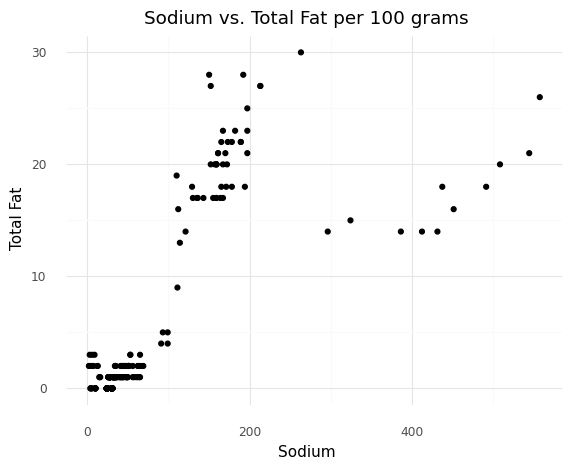

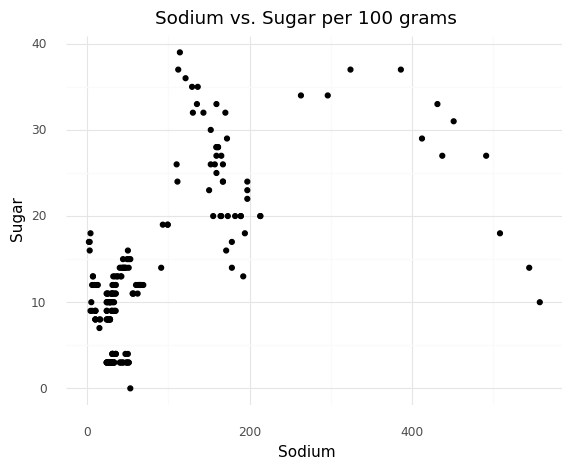

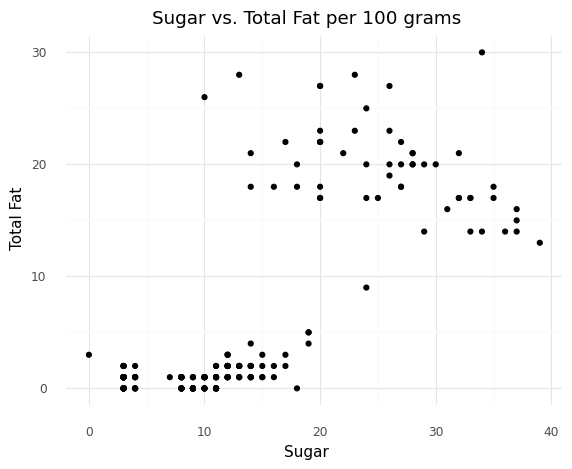

<ggplot: (8781440311673)>

In [97]:
# a

print(ggplot(df, aes(x = "Sodium_100g", y = "Total_Fat_100g")) 
 + geom_point() 
 + labs(x = "Sodium", y = "Total Fat", title = "Sodium vs. Total Fat per 100 grams")
 + theme_minimal())

print(ggplot(df, aes(x = "Sodium_100g", y = "Sugar_100g")) 
 + geom_point() 
 + labs(x = "Sodium", y = "Sugar", title = "Sodium vs. Sugar per 100 grams")
 + theme_minimal())

(ggplot(df, aes(x = "Sugar_100g", y = "Total_Fat_100g")) 
 + geom_point() 
 + labs(x = "Sugar", y = "Total Fat", title = "Sugar vs. Total Fat per 100 grams")
 + theme_minimal())

b) 
I believe for the graphs presented above, **DBSCAN** would be the best clustering algorithm. 

For starters, we should talk about the algorithms that make some assumptions on the shapes of the clusters. I would say that **KMeans** or **Gassian Mixture Models (EM)** are not applicable for these graphs. In **KMeans**, we assume spherical clusters, and in **EM**, we assume eliptical clusters. We say that eliptical clusters are clusters that do not need to be perfectly spherical like in **KMeans**. On the other hand, we know that **DBSCAN** is good for weirdly-shaped clusters as there is no assumption about the shapes of the graphs, and since our graphs do not take on a spherical or elipsoid shape, I would argue that is one reason for choosing **DBSCAN**. (I will note that the two of the graphs does take on some elipsoid shapes, but I still firmly believe that my reasoning for DBSCAN is stronger). I would also argue against **Hierarchical Agglomerative Clustering** because of the few cons it has. Even though it is not a big deal for our dataset, **Hierarchical Agglomerative Clustering** performs in O(N^3), which is very slow because we have to calculate the distance between the point in question and every other point. Additionally, we are unable to unmerge clusters in **Hierarchical Agglomerative Clustering**, so if we wanted to make any changes we would not be able to. 

Finally, my main reason for choosing **DBSCAN** over **EM** was because I believe that there are some noise points located within the graphs. **DBSCAN** is the the only algorithm that is able to locate points that are not part of a cluster, and I firmly believe that those points exist in each of the graphs. It was certainly a difficult decision between **DBSCAN** and **EM**, but beacuse of the noise points, I believe they outweigh the elipsoid shape of some of the graphs. Therefore, **DBSCAN** is my choice. 

[[0.         0.46716575 0.49778553 ... 1.05772259 1.05951664 1.05951664]
 [0.         0.50984962 0.51993373 ... 2.68231865 2.68673124 2.68796295]
 [0.         0.11639887 0.15075346 ... 1.1417225  1.1417225  1.21333475]
 ...
 [0.         0.0192568  0.05777041 ... 0.28036002 0.28036002 0.28036002]
 [0.         0.0192568  0.03851361 ... 0.26471263 0.26471263 0.26471263]
 [0.         0.10881049 0.10881049 ... 0.26398551 0.26403536 0.26769666]]


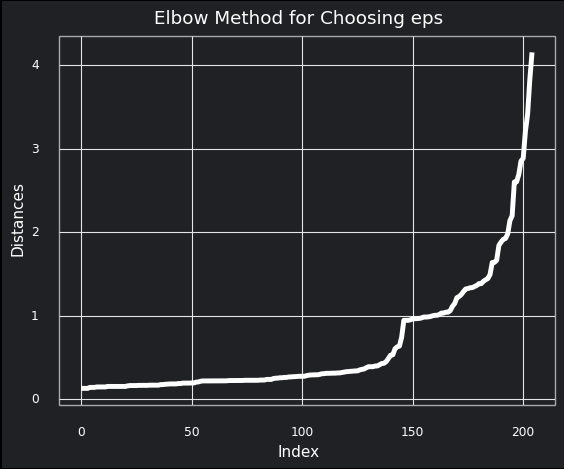


Silhouette score:  0.7708600525774141


In [127]:
# c

z = StandardScaler()
predictors = ["Sodium_100g", "Total_Fat_100g","Sugar_100g", "Saturated_Fat_100g", "Trans_Fat_100g", 
                "Cholesterol_100g", "Sodium_100g", "Potassium_100g", "Carbohydrates_100g", "Protein_100g", 
                "Dietary_Fiber_100g", "Serving_Size"]

threeVars = ["Sodium_100g", "Total_Fat_100g","Sugar_100g"]
mins = 30

df[predictors] = z.fit_transform(df[predictors])

nn = NearestNeighbors(mins + 1)
nn.fit(df[threeVars])

distances, neighbors = nn.kneighbors(df[threeVars])

print(distances)

distances = np.sort(distances[:, mins], axis = 0)

distances_df = pd.DataFrame({"Distances": distances, "Index": list(range(0, len(distances)))})

plt = (ggplot(distances_df, aes(x = "Index", y = "Distances")) 
       + geom_line(color = "white", size = 2) 
       + theme_minimal() + labs(title = "Elbow Method for Choosing eps") 
       + theme(panel_grid_minor = element_blank(),
            rect = element_rect(fill = "#202124ff"),
            axis_text = element_text(color = "white"), 
            axis_title = element_text(color = "white"), 
            plot_title = element_text(color = "white"), 
            panel_border = element_line(color = "darkgray"), 
            plot_background = element_rect(fill = "#202124ff")))

ggsave(plot = plt, filename = 'elbow.png', dpi = 300) 
print(plt)

dbScan = DBSCAN(eps = 1, min_samples = 30).fit(df[threeVars])

labels = ["Noise"]
labels = labels + ["Cluster " + str(i) for i in range(1, len(set(dbScan.labels_)))]

df["clusters"] = dbScan.labels_

data_clustered = df.loc[(df.clusters >= 0)]

print("Silhouette score: ", silhouette_score(data_clustered[threeVars], data_clustered["clusters"]))

c)
The only hyperparameters that we needed to find for **DBSCAN** were the **esp** value and the **min_samples** value. As seen above, we were able to use the Elbow Method to find our **esp** value. The code for this is above, and its respective graph is output in the black and white. Within the graph, we are looking for an **inflection point**, which is an abrupt change in the slope of the graph. When looking at the graph, we can estimate this number to be at 1, which is why I set my **esp = 1**. As for the **min_samples**, this was a true testament to the theory of trial and error. After testing it with several **min_samples** values, I was able to deduce that a number greater than 25 would output an optimal silhouette score. After even more testing (just trying out different numbers for **min_values** and seeing what would return a higher silhouette score), I found that a **min_samples value of 30** would yield the highest silhouette score. 

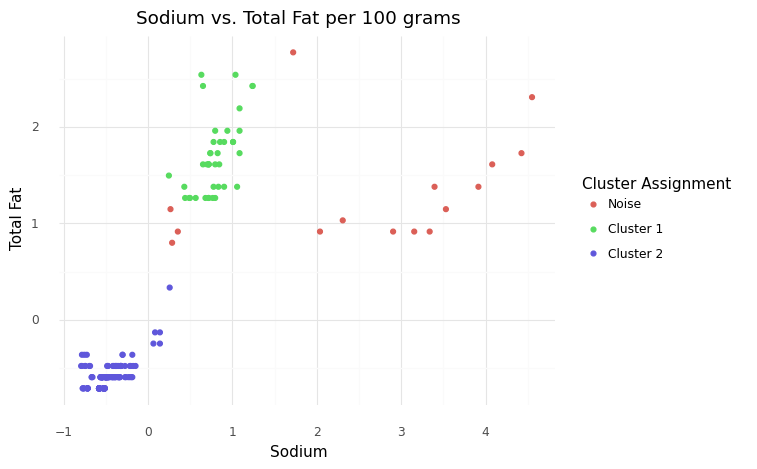

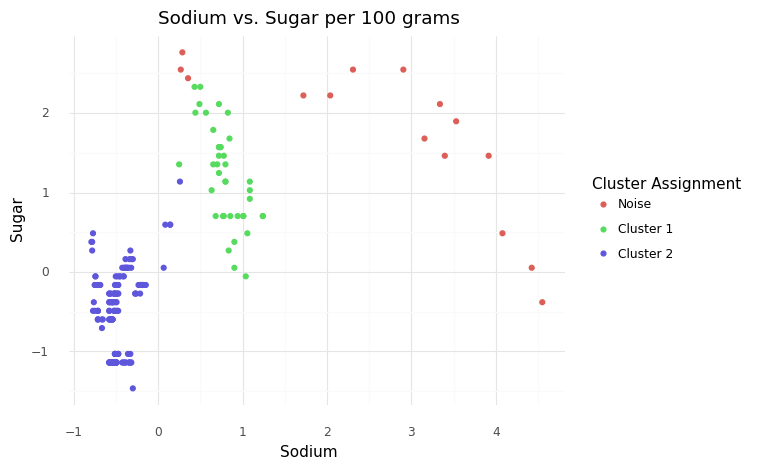

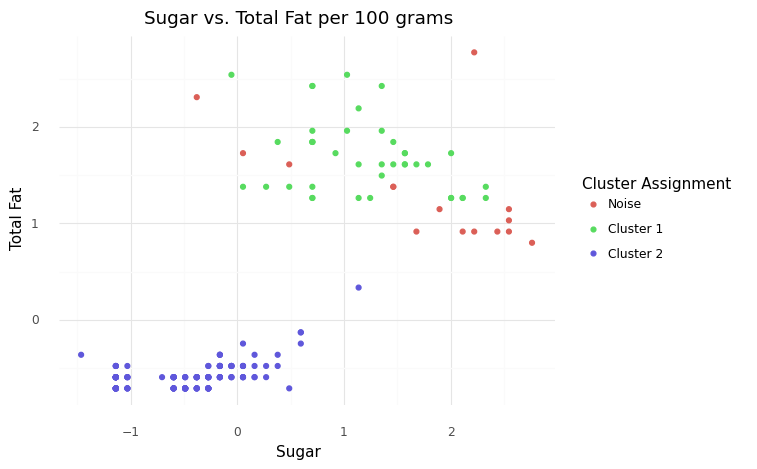

<ggplot: (8781459578236)>

In [128]:
#d

print(ggplot(df, aes(x = "Sodium_100g", y = "Total_Fat_100g", color = "factor(clusters)")) 
 + geom_point() 
 + labs(x = "Sodium", y = "Total Fat", title = "Sodium vs. Total Fat per 100 grams")
 + theme_minimal()
 + scale_color_discrete(name = "Cluster Assignment", labels = labels))

print(ggplot(df, aes(x = "Sodium_100g", y = "Sugar_100g", color = "factor(clusters)")) 
 + geom_point() 
 + labs(x = "Sodium", y = "Sugar", title = "Sodium vs. Sugar per 100 grams")
 + theme_minimal()
 + scale_color_discrete(name = "Cluster Assignment", labels = labels))

(ggplot(df, aes(x = "Sugar_100g", y = "Total_Fat_100g", color = "factor(clusters)")) 
 + geom_point() 
 + labs(x = "Sugar", y = "Total Fat", title = "Sugar vs. Total Fat per 100 grams")
 + theme_minimal()
 + scale_color_discrete(name = "Cluster Assignment", labels = labels))

d) I used silhouette score to measure the success of the model. After seeing a silhouette score of 0.77 for our **DBSCAN** model, I was pretty confident that the clusters would look well separated with a decent bit of cohesion. In all 3 of the graphs, we can see that the green group would usually reside in the bottom left part of the graph. This indicates that this type of donut is very low in sugar, total fat, and sodium. All in all, this must be some sort of wheat donut. The blue cluster shows high levels of both total fat and sugar, but relatively lower levels of sodium. We can see this to be true because in the graphs where sodium is the x-axis, the blue points are all on the higher parts of the graph. Then, when we plot Total Fat vs. Sugar, the points are mainly located in the top right, because it has high levels of total Fat and sugar. Finally, we have the noise points, which are dispersed throughout the graph and do not belong to either of the two clusters. 

In [133]:
# e

fourVars = ["Sodium_100g", "Total_Fat_100g", "Sugar_100g", "Saturated_Fat_100g"]
mins = 30
nn = NearestNeighbors(mins + 1)
nn.fit(df[fourVars])
distances, neighbors = nn.kneighbors(df[fourVars]) 

display(distances)

distances = np.sort(distances[:, mins], axis = 0)
distances_df = pd.DataFrame({"Distances": distances, "Index": list(range(0,len(distances)))})

plt = (ggplot(distances_df, aes(x = "Index", y = "Distances")) 
       + geom_line(color = "white", size = 2) 
       + theme_minimal() + labs(title = "Elbow Method for Choosing eps") 
       + theme(panel_grid_minor = element_blank(),
        rect = element_rect(fill = "#202124ff"),
        axis_text = element_text(color = "white"), 
        axis_title = element_text(color = "white"), 
        plot_title = element_text(color = "white"), 
        panel_border = element_line(color = "darkgray"), 
        plot_background = element_rect(fill = "#202124ff")))

ggsave(plot = plt, filename = 'elbow.png', dpi = 300) 

plt

db = DBSCAN(eps = 1, min_samples = 30).fit(df[fourVars]) 

labsList = ["Noise"]
labsList = labsList + ["Cluster " + str(i) for i in range(1,len(set(db.labels_)))]

df["assignments"] = db.labels_
data_clustered = df.loc[(df.assignments >= 0)]
silhouette_score(data_clustered[fourVars], data_clustered["assignments"])

array([[0.        , 0.46716575, 0.56168664, ..., 1.1788057 , 1.18041574,
        1.18041574],
       [0.        , 0.51993373, 0.57240553, ..., 2.78732148, 2.79359024,
        2.79359024],
       [0.        , 0.15075346, 0.28504412, ..., 1.32283642, 1.34855161,
        1.37211278],
       ...,
       [0.        , 0.0192568 , 0.05777041, ..., 0.33114561, 0.33114561,
        0.33114561],
       [0.        , 0.0192568 , 0.03851361, ..., 0.31683876, 0.31683876,
        0.31683876],
       [0.        , 0.10881049, 0.10881049, ..., 0.28364587, 0.28364587,
        0.28994917]])

0.8088389736722149

e) I chose **saturated fat** as my fourth predictor variable. I came to this conclusion because I tested every other continuous predictor that we had, and calculated the silhouette score for all of them. After seeing that **saturated fat** increased our silhouette score from 0.77 to 0.81, I picked it as my varialble. To conclude, **saturated fat** improved the fit of our **DBSCAN** model.